# Naive Bayes Classifier on Yelp Dataset Report

In this project, we need to predict the category of a given point of interest with the Naive Bayes Classifier. The dataset we use is Yelp Dataset, specifically simplified and focused on New Orleans points of interest (POIs). Each record in the dataset represents a single point of interest (POI) in New Orleans — like a restaurant, shopping place, or nightlife spot with key columns such as:

| Column Name          | Description                                   |
|----------------------|-----------------------------------------------|
| name                 | Name of the POI                               |
| latitude & longitude | GPS coordinates of the business               |
| review               | A sample user-written review                  |
| mean_checkin_time    | Average check-in time                         |
| category             | Target label (Restaurant, Shopping, Nightlife)|



## A. Naive Bayes Classifier
In the Machine Learning Book, Tom Mitchell presents Naive Bayes that makes predictions by computing:

$$
v_{NB} = \arg\max_{v_j \in \mathcal{V}} P(v_j) \prod_{i} P(a_i \mid v_j)
$$

Where:
- $v_{NB}$ = target value output
- $v_j$ = class label
- $a_i$ = feature
- $P(v_j)$ = prior probability of class $v_j$
- $P(a_i \mid v_j)$ = likelihood of seeing word $a_i$ in class $v_j$

We need to classify the review attribute as text classification for the assignment. In text classification, we represent each document as word counts with multiple categories, leading to a multinomial model (not just binary (binomial)). Mximum likelihood in multinomial model can be obtained with the formula:

$$
y_{ML} = \arg\max_{v_j} P(v_j) \prod_{i} P(a_i \mid v_j)^{x_i}
$$

where $x_i$ is the count of word *i* in the document. We then compute the Class Prior probabilities and Word Likelihood with Laplace Smoothing.

- Class Prior:

$$
P(v_j) = \frac{\text{\# of docs in class } v_j}{\text{total \# of docs}}
$$

- Word likelihood with Laplace smoothing:

$$
P(a_i \mid v_j) = \frac{\text{count of } a_i \text{ in class } v_j + 1}{\text{total words in class } v_j + |\mathcal{V}|}
$$

Where $|\mathcal{V}|$ is the vocabulary size.

In order to get more stability and efficiency, I transform the Maximum likelihood formula with logs:

$$
y_{ML} = \arg\max_c \log P(v_j) + \sum_i x_i \log P(a_i \mid v_j)
$$

Logs can avoid underflow (result becomes ~0) when multiplying many small probabilities (e.g., 0.0003 × 0.002 × 0.001). Taking logs turns multiplication into addition so that underflow can be avoided. Log-transform also turns expensive products into cheap sums to make vectorizer faster and easier.



## B. Word Vector Representation
Word vector representation is a technique for representing natural language words as numerical vectors. These vectors capture the meaning and context of the words, allowing them to be used in various natural language processing tasks, such as language translation and text classification. This assignment uses two methods of word vectorizer: Bag of Words (BOW) and TF-IDF.

The Bag of Words (BOW) model represents a text as a numerical vector. It works by creating a vocabulary of all the unique words in a text and then creating a vector for each document that counts the number of times each word appears in the document. The BOW model is a simple but effective way to represent text as a numerical vector. However, it has some limitations, as it does not capture the meaning or context of the words. 

One way to improve the BOW model is by using the Term Frequency-Inverse Document Frequency (TF-IDF) weighting scheme. The idea behind TF-IDF is to weigh each document's words based on their importance to the document's meaning. Moreover, TF-IDF can improve performance because it filters out noisy, familiar words and works better when documents vary in length or verbosity.



## C. Build Naive Bayes Classifier Baseline Model from Scratch

I implemented the Naive Bayes Text Classifier for this task using the Maximum Likelihood formula shown in part A. I used the BOW method for this model to vectorize the *review* attribute. I also encode the categories so they have numerical labels. After these preprocessing steps, we put the data into the Naive Bayes Model. The model class is as follows:

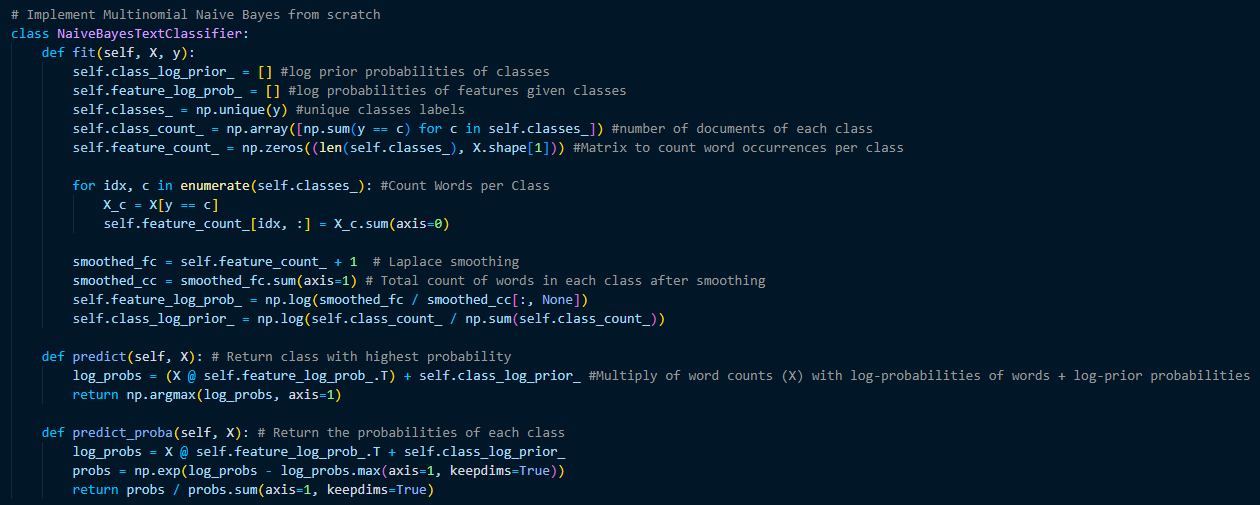

The class is divided into two functions: fit, predict, and predict_proba. In the fit function, first, all the variables, including prior probabilities, probabilities of features, class labels, number of documents, and word occurrences, are initiated. After that, the sum of words across all documents is counted to get the class prior probability. Next, word likelihood is calculated using the Laplace smoothing. On the other hand, the predict function counts the logarithmic Maximum Likelihood and returns the class with the highest probability. predict_proba function returns the probabilities of each class which will be useful to count the ROC AUC.

After running the model, we obtained an accuracy of 88%, indicating that the model correctly classified more than four out of five samples. 

In the dataset, we can see that the Nightlife category (which is encoded by 0) has the lowest number in the dataset, which makes it become a minority. That's why this category has a low f1-score. Moreover, we can also see an imbalanced dataset number between each category. For this imbalanced classification, we can see the average-weighted f1-score for the metric. Weighted average f1-score weighting each class's contribution based on its proportion in the dataset. The average-weighted f1 score we get is 86%, which means our model is doing well across all classes, even if some are harder to classify.

Meanwhile for the ROC AUC Score, we get 0.96%. It means that the model is very good at distinguishing between the classes. Even if the model predicts the wrong class, it might still assign high probability to the correct one.

## D. Improve the Baseline Model

Based on the **Tackling the Poor Assumptions of Naive Bayes Text Classifiers** by Rennie et al., Multinomial Naive Bayes (MNB) is often used to classify text because of its simplicity and fast to implement. However, MNB has some limitations in real-world text tasks. First, MNB assumes all words are conditionally independent, given the class. It means that knowing every word contributes independently to the probability of class. But in text, words often co-occur or are highly dependent on each other.

Second, standard MNB estimates word probabilities based only on examples within a class. If a class has few examples, word estimates can be noisy or unreliable. Third, words that appear in only one class can dominate predictions; even a single unusual word can sway the classifier disproportionately. Lastly, longer texts have higher word counts, producing more significant likelihood scores, making the model biased in favor of them.

To resolve those problems, I implemented several improvements to boost the model performance, such as Complement Naive Bayes (CNB), TF-IDF, and Length Normalization. In Complement Naive Bayes, instead of calculating the probability of a word belonging to a specific class, we calculate the probability of a word being part of all other classes. This will help to get better word probability estimates, especially for underrepresented courses, that are more robust against class imbalance and reduce overfitting to rare words.

TF-IDF is a weighting scheme that adjusts raw word counts based on how often the word appears in the document and how rare the word is across the entire dataset. It will help reduce the influence of common, non-discriminative words and give higher weight to informative, rare terms. Length Normalization ensures that all document vectors have unit length, regardless of how many words they contain. It prevents longer documents from producing disproportionately high likelihood scores, ensures fairer comparisons between short and long documents, and eliminates length bias, so the model focuses on content, not document size.

So, for task 2, I made some modifications to the code. For the word vectorizer, I changed the method from CountVectorizer to TfidfVectorizer. Then, I changed the model I created from Scrath to using Complement Naive Bayes from sklearn libraries for the Naive Bayes model. To find the best hyperparameters for the TFIDF and CNB, I did the cross-validation with 5-fold. The Hyperparameters that are going to be tuned are:

**a. TF-IDF Vectorizer Parameters**
1. min_df: Minimum number of documents a word must appear in to be included in the vocabulary.
2. max_df: Maximum document frequency threshold. For example, if max_df = 0.8, it ignores words that appear in more than 80% of documents.
3. norm: apply the length normalization or not.

**b. CNB Parameters**
1. alpha: Laplace smoothing parameter
2. fit_prior: Whether to learn class prior probabilities from the data

After we run the new model with Cross validation, we get the Best Parameters for the model: 
min_df = 2, max_df = 0.8, norm = l2, alpha = 0.5, and fit_prior = True. From this parameters, we know that applying the length normalization and set the laplace smoothing with the value 0.5 give improvements for the model.

The evaluation gives the result of 90% accuracy, f1 score 90% and and ROC AUC Score 0.975 which increase relatively high than the baseline model. 

## E. Improve Model by Adding Additional Attributes

I try to further improved the model's performance in this task by adding additional attributes. For the extra features, I chose the dataset's numerical attributes: longitude, latitude, and mean_checkin_time. Those features are selected because they can be scaled, normalized, and directly fed into the Naive Bayes model after preprocessing. Meanwhile, the name features are not considered additional features because every POI name is unique or rare, which has high variability and sparsity so that it won't be useful for the model. 

I try all possible combinations to add the numerical attributes to the review attributes. The combinations are Latitude, Longitude, Review; Mean Checkin Time, Review; All numerical attributes, Review. The one with the best performance will be chosen from all those combinations. To combine the numerical attributes and review, we need to scale those attributes to have positive values and the same range value as the TFIDF Vectorizer. To do this, we use the MinMaxScaler Library. By default, this library scale values to numbers between 0-1. However, because TFIDF has small values (0 - 0.1), we must specify the MinMaxScaler for that value range. After the features have been scaled, we put them on spare matrices, which only store non-zero entries, to save memory and computational time.

After that, I combine the scaled numerical features with review attribute that has been vectorized with TFIDF Vectorizer with the best hyperparameters defined in task 2. To combine them, Horizontal Stack (hstack) is used. hstack builds the full feature vector per document by concatenating the all matrices horizontally. Next, I put those data to the CNB model with the most optimal hyperparameters. The results are:

1. Latitude + Longitude + Review
- Accuracy: 90%
- F1 (weighted): 90%
- ROC AUC (macro): 0.9758

2. Mean Check-in Time + Review
- Accuracy: 90%
- F1 (weighted): 90%
- ROC AUC (macro): 0.9759

3. All Numerical Features + Review
- Accuracy: 90%
- F1 (weighted): 90%
- ROC AUC (macro): 0.9758

As for the result, all three combinations don't really affect the performance. From my analysis, the review text already contains strong information and domination for the classification decisions, proved by high accuracy gain in the baseline model. The numerical features don't clearly separate categories, especially the location. Latitude and Longitude values are close together since this is the dataset in New Orleans. Lastly, the model we use is Complement Naive Bayes, which adds each feature's log probabilities independently. If new features don't give substantial value, the total score won't be enough to change the predictions.

## F. Conclusion
In conclusion, the review text alone is highly predictive of POI category, as demonstrated by the high accuracy and AUC scores. Although additional structured features like GPS coordinates and check-in time were explored, they did not substantially improve model performance. This supports the strength of TF-IDF and CNB as a text-focused classification strategy for this task.

### Build a baseline model by implementing the Naive Bayes classifier from scratch

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize

# Load training and testing data
train_df = pd.read_csv("training.csv")
test_df = pd.read_csv("testing.csv")

# Prepare the data
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(train_df['review'])
X_test_counts = vectorizer.transform(test_df['review'])

# Encode labels
print("Count of each category in training dataset:\n", train_df['category'].value_counts())
print("\nCount of each category in test dataset:\n", test_df['category'].value_counts())
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['category'])
y_test = label_encoder.transform(test_df['category'])
classes = label_encoder.classes_
category_to_number = {category: num for num, category in enumerate(label_encoder.classes_)}
print("\nEncoded Category Mapping: ", category_to_number)
n_classes = len(classes)

# Implement Multinomial Naive Bayes from scratch
class NaiveBayesTextClassifier:
    def fit(self, X, y):
        self.class_log_prior_ = [] #log prior probabilities of classes
        self.feature_log_prob_ = [] #log probabilities of features given classes
        self.classes_ = np.unique(y) #unique classes labels
        self.class_count_ = np.array([np.sum(y == c) for c in self.classes_]) #number of documents of each class
        self.feature_count_ = np.zeros((len(self.classes_), X.shape[1])) #Matrix to count word occurrences per class

        for idx, c in enumerate(self.classes_): #Count Words per Class
            X_c = X[y == c]
            self.feature_count_[idx, :] = X_c.sum(axis=0)

        smoothed_fc = self.feature_count_ + 1  # Laplace smoothing
        smoothed_cc = smoothed_fc.sum(axis=1) # Total count of words in each class after smoothing
        self.feature_log_prob_ = np.log(smoothed_fc / smoothed_cc[:, None])
        self.class_log_prior_ = np.log(self.class_count_ / np.sum(self.class_count_))

    def predict(self, X): # Return class with highest probability
        log_probs = (X @ self.feature_log_prob_.T) + self.class_log_prior_ #Multiply of word counts (X) with log-probabilities of words + log-prior probabilities
        return np.argmax(log_probs, axis=1)
    
    def predict_proba(self, X): # Return the probabilities of each class
        log_probs = X @ self.feature_log_prob_.T + self.class_log_prior_
        probs = np.exp(log_probs - log_probs.max(axis=1, keepdims=True))
        return probs / probs.sum(axis=1, keepdims=True)

# Train and Predict
nb = NaiveBayesTextClassifier()
nb.fit(X_train_counts, y_train)
y_pred = nb.predict(X_test_counts)
y_proba = nb.predict_proba(X_test_counts)

#Evaluate the model
classification_report = classification_report(y_test, y_pred)
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes)) # Binarize the test labels for ROC AUC calculation
roc_auc = roc_auc_score(y_test_bin, y_proba, average='weighted', multi_class='ovr')

print("\nClassification Report:\n", classification_report)
print("ROC AUC Score:", roc_auc)


Count of each category in training dataset:
 category
Restaurants    1784
Shopping        718
Nightlife       314
Name: count, dtype: int64

Count of each category in test dataset:
 category
Restaurants    422
Shopping       218
Nightlife       64
Name: count, dtype: int64

Encoded Category Mapping:  {'Nightlife': 0, 'Restaurants': 1, 'Shopping': 2}

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.25      0.40        64
           1       0.86      0.98      0.91       422
           2       0.94      0.89      0.91       218

    accuracy                           0.88       704
   macro avg       0.91      0.70      0.74       704
weighted avg       0.89      0.88      0.86       704

ROC AUC Score: 0.9602830903738554


### Improve on the benchmark model based on the review attribute only

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import ComplementNB

# Build pipeline
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words='english', lowercase=True)),
    ("clf", ComplementNB())
])

# Parameter grid
param_grid = {
    # TfidfVectorizer options
    "tfidf__min_df": [1, 2, 3],
    "tfidf__max_df": [0.8, 0.9, 1.0],
    "tfidf__norm": ['l2', None],

    # ComplementNB options
    "clf__alpha": [0.01, 0.1, 0.5, 1.0, 2.0],
    "clf__fit_prior": [True, False]
}

# Grid search with 5-fold CV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(train_df["review"], y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(test_df["review"])
y_proba = best_model.predict_proba(test_df["review"])

# Generate classification report
report = classification_report(y_test, y_pred)

# Compute ROC AUC Score
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
roc_auc = roc_auc_score(y_test_bin, y_proba, average='weighted', multi_class='ovr')

# Output
print("Best Parameters:", grid_search.best_params_)
print("Test Classification Report:\n", report)
print("Test ROC AUC Score (weighted):", roc_auc)


Best Parameters: {'clf__alpha': 0.5, 'clf__fit_prior': True, 'tfidf__max_df': 0.8, 'tfidf__min_df': 2, 'tfidf__norm': 'l2'}
Test Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.58      0.62        64
           1       0.93      0.94      0.93       422
           2       0.92      0.94      0.93       218

    accuracy                           0.90       704
   macro avg       0.84      0.82      0.83       704
weighted avg       0.90      0.90      0.90       704

Test ROC AUC Score (weighted): 0.9758957132053644


### Improve model by adding additional attributes to the model

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from scipy.sparse import csr_matrix, hstack

# Scale numeric features
minmax_scaler = MinMaxScaler(feature_range=(0, 0.1))
lat_lon_scaled = minmax_scaler.fit_transform(train_df[['latitude', 'longitude']])
lat_lon_test_scaled = minmax_scaler.transform(test_df[['latitude', 'longitude']])
time_scaled = minmax_scaler.fit_transform(train_df[['mean_checkin_time']])
time_test_scaled = minmax_scaler.transform(test_df[['mean_checkin_time']])
all_scaled = minmax_scaler.fit_transform(train_df[['latitude', 'longitude', 'mean_checkin_time']])
all_test_scaled = minmax_scaler.transform(test_df[['latitude', 'longitude', 'mean_checkin_time']])

# Sparse matrices
lat_lon_sparse = csr_matrix(lat_lon_scaled)
lat_lon_test_sparse = csr_matrix(lat_lon_test_scaled)
time_sparse = csr_matrix(time_scaled)
time_test_sparse = csr_matrix(time_test_scaled)
all_sparse = csr_matrix(all_scaled)
all_test_sparse = csr_matrix(all_test_scaled)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, min_df=2, max_df=0.8, norm='l2')
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['review'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['review'])

# Combine features
combo1_X_train = hstack([X_train_tfidf, lat_lon_sparse])
combo1_X_test = hstack([X_test_tfidf, lat_lon_test_sparse])
combo2_X_train = hstack([X_train_tfidf, time_sparse])
combo2_X_test = hstack([X_test_tfidf, time_test_sparse])
combo3_X_train = hstack([X_train_tfidf, all_sparse])
combo3_X_test = hstack([X_test_tfidf, all_test_sparse])

# Binarize labels for ROC AUC
import numpy as np
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Build model
cnb = ComplementNB(alpha=0.5, fit_prior=True)

# Evaluate models
model1 = cnb.fit(combo1_X_train, y_train)
y_pred1 = model1.predict(combo1_X_test)
y_proba1 = model1.predict_proba(combo1_X_test)
cr1 = classification_report(y_test, y_pred1)
roc1 = roc_auc_score(y_test_bin, y_proba1, average='weighted', multi_class='ovr')

model2 = cnb.fit(combo2_X_train, y_train)
y_pred2 = model2.predict(combo2_X_test)
y_proba2 = model2.predict_proba(combo2_X_test)
cr2 = classification_report(y_test, y_pred2)
roc2 = roc_auc_score(y_test_bin, y_proba2, average='weighted', multi_class='ovr')

model3 = cnb.fit(combo3_X_train, y_train)
y_pred3 = model3.predict(combo3_X_test)
y_proba3 = model3.predict_proba(combo3_X_test)
cr3 = classification_report(y_test, y_pred3)
roc3 = roc_auc_score(y_test_bin, y_proba3, average='weighted', multi_class='ovr')

print("Classification Report Latitude, Longitude, and Review:\n", cr1)
print("ROC AUC Score Latitude, Longitude, and Review:", roc1)
print("\nClassification Report Time and Review:\n", cr2)
print("ROC AUC Score Time and Review:", roc2)
print("\nClassification Report all numerical features and Review:\n", cr3)
print("ROC AUC Score all numerical features and Review:", roc3)


Classification Report Latitude, Longitude, and Review:
               precision    recall  f1-score   support

           0       0.66      0.58      0.62        64
           1       0.93      0.94      0.93       422
           2       0.92      0.94      0.93       218

    accuracy                           0.90       704
   macro avg       0.84      0.82      0.83       704
weighted avg       0.90      0.90      0.90       704

ROC AUC Score Latitude, Longitude, and Review: 0.9758824971077252

Classification Report Time and Review:
               precision    recall  f1-score   support

           0       0.66      0.58      0.62        64
           1       0.93      0.94      0.93       422
           2       0.92      0.94      0.93       218

    accuracy                           0.90       704
   macro avg       0.84      0.82      0.83       704
weighted avg       0.90      0.90      0.90       704

ROC AUC Score Time and Review: 0.9759471026197257

Classification Report al